In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
labels = df[['Ground Temperature']].copy()

In [ ]:
response = df[['Chirps/Second']].copy()

In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(labels, response)

LinearRegression()

**Linear Regression Equation Coefficients**

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

[0.45931465]
[[0.20299973]]


**Plotting the regression against the data**

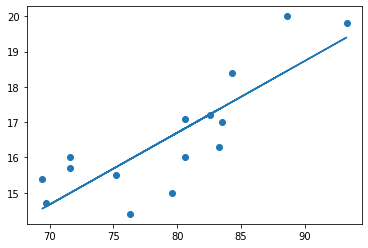

In [ ]:
plt.scatter(labels, response)
plt.plot(labels, linreg.predict(labels))
plt.show()

# The **R2** score shows that it's not an especially strong correlation 

In [ ]:
linreg.score(labels, response)

0.6922946529146998


# A temperature of 95 predicts 19.74 chirps/s. A 18chirp/s frequency predicts 84 degrees.

In [ ]:
new_temp = np.array(95)
new_temp = new_temp.reshape(-1,1)
linreg.predict(new_temp)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[19.74428913]])

In [ ]:
chirp_reg = linear_model.LinearRegression()
chirp_reg.fit(response, labels)

LinearRegression()

In [ ]:
chirp_reg.predict(np.array(18).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[84.2347963]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

# Brain Body

The outliers probably don't distort the slope too much. It looks like the slope coefficient would be similar without them. But the  score (0.87) shows a strong relationship between brain and body weights.

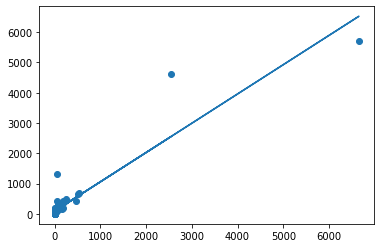

0.8726620843043331

In [ ]:
independent = df[['Brain']]
dependent = df[['Body']]

body_reg = linear_model.LinearRegression()
body_reg.fit(independent, dependent)


plt.scatter(independent, dependent)
plt.plot(independent, body_reg.predict(independent))
plt.show()

body_reg.score(independent, dependent)

In [ ]:
print('R^2 score for this equation: {:.4f}'
      .format(body_reg.score(independent, dependent)))

R^2 score for this equation: 0.8727


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
independent = df[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
dependent = df.Salary


# Columns, R2 Scores, Oh my!
The combination of all five columns performs best at 0.855. However, Sex alone is seemingly not correlated to Salary.

In [ ]:
salary_reg = linear_model.LinearRegression()
salary_reg.fit(independent, dependent)

all_five = salary_reg.score(independent, dependent)
all_five_intercept_coefficient = (salary_reg.intercept_, salary_reg.coef_)
print("All Five R**2 Score: ", all_five)
print("All Five Intercept & Coefficients: ", all_five_intercept_coefficient)

All Five R**2 Score:  0.8547180674410969
All Five Intercept & Coefficients:  (11410.14654725559, array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354]))


In [ ]:
independent = df[["Sex", "Rank", "Year", "Degree"]]
salary_reg = linear_model.LinearRegression()
salary_reg.fit(independent, dependent)

s_r_y_d = salary_reg.score(independent, dependent)
s_r_y_d_intercept_coefficient = (salary_reg.intercept_, salary_reg.coef_)
print("s_r_y_d R**2 Score: ", s_r_y_d)
print("s_r_y_d Intercept & Coefficients: ", s_r_y_d_intercept_coefficient)

s_r_y_d R**2 Score:  0.845547641297936
s_r_y_d Intercept & Coefficients:  (11101.27364777424, array([ 608.10026674, 4753.16913715,  391.84035843, -134.21945255]))


In [ ]:
independent = df[["Sex", "Rank", "Year"]]
salary_reg = linear_model.LinearRegression()
salary_reg.fit(independent, dependent)

s_r_y = salary_reg.score(independent, dependent)
s_r_y_intercept_coefficient = (salary_reg.intercept_, salary_reg.coef_)
print("s_r_y R**2 Score: ", s_r_y)
print("s_r_y Intercept & Coefficients: ", s_r_y_intercept_coefficient)

s_r_y R**2 Score:  0.8454319861987166
s_r_y Intercept & Coefficients:  (11011.762865385323, array([ 603.77322722, 4747.1829411 ,  393.86147574]))


In [ ]:
independent = df[["Sex", "Rank"]]
salary_reg = linear_model.LinearRegression()
salary_reg.fit(independent, dependent)

s_r = salary_reg.score(independent, dependent)
s_r_intercept_coefficient = (salary_reg.intercept_, salary_reg.coef_)
print("s_r R**2 Score: ", s_r)
print("s_r Intercept & Coefficients: ", s_r_intercept_coefficient)

s_r R**2 Score:  0.7554917749443394
s_r Intercept & Coefficients:  (12041.938232830831, array([-738.12667504, 5864.44325796]))


In [ ]:
independent = df[["Sex"]]
salary_reg = linear_model.LinearRegression()
salary_reg.fit(independent, dependent)

sex = salary_reg.score(independent, dependent)
sex_intercept_coefficient = (salary_reg.intercept_, salary_reg.coef_)
print("sex R**2 Score: ", sex)
print("sex Intercept & Coefficients: ", sex_intercept_coefficient)

sex R**2 Score:  0.06389892583288004
sex Intercept & Coefficients:  (24696.78947368421, array([-3339.64661654]))
